<a href="https://colab.research.google.com/github/MAL3X-01/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/BitcoinStorytellingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Gold Data Cleanup

In [2]:
# https://www.perthmint.com/historical_metal_prices.aspx
goldold = pd.read_csv('goldmonthlyend.csv')

goldcurrent = pd.read_csv('goldmonthly-current.csv')
goldold.head(5)

,Market,Perth Mint Spot,Perth Mint Spot.1,Perth Mint Spot.2,Perth Mint Spot.3,Perth Mint Spot.4,Perth Mint Spot.5,Perth Mint Spot.6,Perth Mint Spot.7,Perth Mint Spot.8,Perth Mint Spot.9,Perth Mint Spot.10,Perth Mint Spot.11,Perth Mint Spot.12,Perth Mint Spot.13,Perth Mint Spot.14,Perth Mint Spot.15,Perth Mint Spot.16,Perth Mint Spot.17,Perth Mint Spot.18,Perth Mint Spot.19,Perth Mint Spot.20,Perth Mint Spot.21,Perth Mint Spot.22,Perth Mint Spot.23,Perth Mint Spot.24,Perth Mint Spot.25,Perth Mint Spot.26,Perth Mint Spot.27,Perth Mint Spot.28,Perth Mint Spot.29,Perth Mint Spot.30,Perth Mint Spot.31,Perth Mint Spot.32,Perth Mint Spot.33,Perth Mint Spot.34,Perth Mint Spot.35,Perth Mint Spot.36,Perth Mint Spot.37,Perth Mint Spot.38,Perth Mint Spot.39,Perth Mint Spot.40,Perth Mint Spot.41,Perth Mint Spot.42,Perth Mint Spot.43,Perth Mint Spot.44,Perth Mint Spot.45,Perth Mint Spot.46,Perth Mint Spot.47,Perth Mint Spot.48,Perth Mint Spot.49,Perth Mint Spot.50,Perth Mint Spot.51,Perth Mint Spot.52,Perth Mint Spot.53,Perth Mint Spot.54,Perth Mint Spot.55,Perth Mint Spot.56,Perth Mint Spot.57,Perth Mint Spot.58,Perth Mint Spot.59,Perth Mint Spot.60,Perth Mint Spot.61,Perth Mint Spot.62,Perth Mint Spot.63,Perth Mint Spot.64,Perth Mint Spot.65,Perth Mint Spot.66,Perth Mint Spot.67,Perth Mint Spot.68,Perth Mint Spot.69,Perth Mint Spot.70,Perth Mint Spot.71,Perth Mint Spot.72,Perth Mint Spot.73,Perth Mint Spot.74,Perth Mint Spot.75,Perth Mint Spot.76,Perth Mint Spot.77,Perth Mint Spot.78,Perth Mint Spot.79,Perth Mint Spot.80,Perth Mint Spot.81,Perth Mint Spot.82,Perth Mint Spot.83,Perth Mint Spot.84,Perth Mint Spot.85,Perth Mint Spot.86,Perth Mint Spot.87,Perth Mint Spot.88,Perth Mint Spot.89,London Fix,London Fix.1,London Fix.2,London Fix.3,London Fix.4,London Fix.5,London Fix.6,HSRA,Interest Rates,Interest Rates.1,London Fix.7,London Fix.8,London Fix.9,London Fix.10,London Fix.11,London Fix.12,London Fix.13,HSRA.1,Interest Rates.2,Interest Rates.3,London Fix.14,London Fix.15,London Fix.16,London Fix.17,London Fix.18,London Fix.19,London Fix.20,HSRA.2,Interest Rates.4,Interest Rates.5,Stock,Stock.1,CPI,CPIAUCSL_PC1,FEDFUNDS,Real US Short Term Interest Rates,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227
0,Metal/Currency,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD

In [3]:
goldcurrent.head()

,Market,Perth Mint Spot,Perth Mint Spot.1,Perth Mint Spot.2,Perth Mint Spot.3,Perth Mint Spot.4,Perth Mint Spot.5,Perth Mint Spot.6,Perth Mint Spot.7,Perth Mint Spot.8,Perth Mint Spot.9,Perth Mint Spot.10,Perth Mint Spot.11,Perth Mint Spot.12,Perth Mint Spot.13,Perth Mint Spot.14,Perth Mint Spot.15,Perth Mint Spot.16,Perth Mint Spot.17,Perth Mint Spot.18,Perth Mint Spot.19,Perth Mint Spot.20,Perth Mint Spot.21,Perth Mint Spot.22,Perth Mint Spot.23,Perth Mint Spot.24,Perth Mint Spot.25,Perth Mint Spot.26,Perth Mint Spot.27,Perth Mint Spot.28,Perth Mint Spot.29,Perth Mint Spot.30,Perth Mint Spot.31,Perth Mint Spot.32,Perth Mint Spot.33,Perth Mint Spot.34,Perth Mint Spot.35,Perth Mint Spot.36,Perth Mint Spot.37,Perth Mint Spot.38,Perth Mint Spot.39,Perth Mint Spot.40,Perth Mint Spot.41,Perth Mint Spot.42,Perth Mint Spot.43,Perth Mint Spot.44,Perth Mint Spot.45,Perth Mint Spot.46,Perth Mint Spot.47,Perth Mint Spot.48,Perth Mint Spot.49,Perth Mint Spot.50,Perth Mint Spot.51,Perth Mint Spot.52,Perth Mint Spot.53,Perth Mint Spot.54,Perth Mint Spot.55,Perth Mint Spot.56,Perth Mint Spot.57,Perth Mint Spot.58,Perth Mint Spot.59,Perth Mint Spot.60,Perth Mint Spot.61,Perth Mint Spot.62,Perth Mint Spot.63,Perth Mint Spot.64,Perth Mint Spot.65,Perth Mint Spot.66,Perth Mint Spot.67,Perth Mint Spot.68,Perth Mint Spot.69,Perth Mint Spot.70,Perth Mint Spot.71,Perth Mint Spot.72,Perth Mint Spot.73,Perth Mint Spot.74,Perth Mint Spot.75,Perth Mint Spot.76,Perth Mint Spot.77,Perth Mint Spot.78,Perth Mint Spot.79,Perth Mint Spot.80,Perth Mint Spot.81,Perth Mint Spot.82,Perth Mint Spot.83,Perth Mint Spot.84,Perth Mint Spot.85,Perth Mint Spot.86,Perth Mint Spot.87,Perth Mint Spot.88,Perth Mint Spot.89,London Fix,London Fix.1,London Fix.2,London Fix.3,London Fix.4,London Fix.5,London Fix.6,HSRA,Interest Rates,Interest Rates.1,London Fix.7,London Fix.8,London Fix.9,London Fix.10,London Fix.11,London Fix.12,London Fix.13,HSRA.1,Interest Rates.2,Interest Rates.3,London Fix.14,London Fix.15,London Fix.16,London Fix.17,London Fix.18,London Fix.19,London Fix.20,HSRA.2,Interest Rates.4,Interest Rates.5,Stock,Stock.1,CPI,CPIAUCSL_PC1,FEDFUNDS,Real US Short Term Interest Rates
0,Metal/Currency,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Gold,Silver,Platinum,Platinum,Palladium,Palladium,AUD,Federal Funds Rate,On Call Unofficial,Gold,Gold,Silver,Platinum,Platinum,Palladium,Palladium,AUD,Federal Funds Rate,On Call Unofficial,Gold,Gold,Silver,Platinum,Platinum,Palladium,Palladium,AUD,Federal Funds Rate,On Call Unofficial,S&P/ASX 200,S&P/ASX 200,All Groups Australia,Consumer Price Index for All Urban Consumers: ...,Effective Federal Funds Rate,NaN
1,Priced In,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,JPY,JPY,JPY,JPY,AUD,AUD,AUD,AUD,AUD,AUD,AUD,AUD,JPY,JPY,JPY,JPY,JPY,JPY,JPY,JPY,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,JPY,JPY,JPY,JPY,AUD,AUD,AUD,AUD,AUD,AUD,AUD,AUD,JPY,JPY,JPY,JPY,JPY,JPY,JPY,JPY,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,JPY,JPY,JPY,JPY,AUD,AUD,AUD,AUD,AUD,AUD,AUD,AUD,JPY,JPY,JPY,JPY,JPY,JPY,JPY,JPY,USD,USD,USD,USD,USD,USD,USD,USD,USD,AUD,USD,USD,USD,USD,USD,USD,USD,USD,USD,AUD,USD,USD,USD,USD,USD,USD,USD,USD,USD,AUD,Accumulation Index,NaN,Index,USD,USD,NaN
2,Price Type,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask

In [4]:
newgoldold = goldold[['Market','Perth Mint Spot']][4:]

print(newgoldold.shape)
newgoldold.head()

(2025, 2)


,Market,Perth Mint Spot
4,Jan 68,NaN
5,Feb 68,NaN
6,Mar 68,NaN
7,Apr 68,NaN
8,May 68,NaN


In [5]:
newgoldold = newgoldold.dropna()

print(newgoldold.shape)
newgoldold.head()

(295, 2)


,Market,Perth Mint Spot
285,Jun 91,368.25
286,Jul 91,371.25
287,Aug 91,364.00
288,Sep 91,354.00
289,Oct 91,363.50


In [6]:
newgoldcurrent = goldcurrent[['Market','Perth Mint Spot']][4:]

print(newgoldcurrent.shape)
newgoldcurrent.head()

(41, 2)


,Market,Perth Mint Spot
4,Jan 16,1121.35
5,Feb 16,1242.96
6,Mar 16,1277.2
7,Apr 16,1273.27
8,May 16,1296.61


In [7]:
newgoldcurrent = newgoldcurrent.dropna()

print(newgoldcurrent.shape)
newgoldcurrent.head()

(41, 2)


,Market,Perth Mint Spot
4,Jan 16,1121.35
5,Feb 16,1242.96
6,Mar 16,1277.2
7,Apr 16,1273.27
8,May 16,1296.61


In [8]:
goldmonthlyprice = pd.concat([newgoldold, newgoldcurrent])

goldmonthlyprice = goldmonthlyprice.reset_index()
goldmonthlyprice = goldmonthlyprice.drop(columns='index')

print(goldmonthlyprice.shape)
goldmonthlyprice.head()

(336, 2)


,Market,Perth Mint Spot
0,Jun 91,368.25
1,Jul 91,371.25
2,Aug 91,364.00
3,Sep 91,354.00
4,Oct 91,363.50


In [9]:
goldmonthlyprice.isnull().sum()

Market             0
Perth Mint Spot    0
dtype: int64

In [10]:
goldmonthlyprice = goldmonthlyprice.rename(columns={'Market':'Date', 'Perth Mint Spot':'Gold Price'})

goldmonthlyprice.head()

,Date,Gold Price
0,Jun 91,368.25
1,Jul 91,371.25
2,Aug 91,364.00
3,Sep 91,354.00
4,Oct 91,363.50


In [11]:
goldmonthlyprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
Date          336 non-null object
Gold Price    336 non-null object
dtypes: object(2)
memory usage: 5.3+ KB


In [12]:
goldmonthlyprice['Date'] = goldmonthlyprice['Date'].apply(lambda x: x.split())

goldmonthlyprice.head()

,Date,Gold Price
0,"[Jun, 91]",368.25
1,"[Jul, 91]",371.25
2,"[Aug, 91]",364.00
3,"[Sep, 91]",354.00
4,"[Oct, 91]",363.50


In [13]:
goldmonthlyprice['Month'] = goldmonthlyprice['Date'].apply(lambda x: x[0])
goldmonthlyprice['Year'] = goldmonthlyprice['Date'].apply(lambda x: int(x[1]))

goldmonthlyprice['Year'] = goldmonthlyprice['Year'].apply(lambda x: '19'+str(x) if x >90 else ('200'+str(x) if x<10 else '20'+str(x)))
goldmonthlyprice.head()

,Date,Gold Price,Month,Year
0,"[Jun, 91]",368.25,Jun,1991
1,"[Jul, 91]",371.25,Jul,1991
2,"[Aug, 91]",364.00,Aug,1991
3,"[Sep, 91]",354.00,Sep,1991
4,"[Oct, 91]",363.50,Oct,1991


In [14]:
goldmonthlyprice['Date'] = goldmonthlyprice['Month'] + goldmonthlyprice['Year']

goldmonthlyprice.head()

,Date,Gold Price,Month,Year
0,Jun1991,368.25,Jun,1991
1,Jul1991,371.25,Jul,1991
2,Aug1991,364.00,Aug,1991
3,Sep1991,354.00,Sep,1991
4,Oct1991,363.50,Oct,1991


In [15]:
goldmonthlyprice['Date'].head().values

array(['Jun1991', 'Jul1991', 'Aug1991', 'Sep1991', 'Oct1991'],
      dtype=object)

In [16]:
goldmonthlyprice['Date'] = pd.to_datetime(goldmonthlyprice['Date'], infer_datetime_format=True)

goldmonthlyprice.head()

,Date,Gold Price,Month,Year
0,1991-06-01,368.25,Jun,1991
1,1991-07-01,371.25,Jul,1991
2,1991-08-01,364.00,Aug,1991
3,1991-09-01,354.00,Sep,1991
4,1991-10-01,363.50,Oct,1991


In [17]:
goldmonthlyprice['Gold Price'].head().values

array([' 368.25 ', ' 371.25 ', ' 364.00 ', ' 354.00 ', ' 363.50 '],
      dtype=object)

In [0]:
goldmonthlyprice['Year'] = goldmonthlyprice['Year'].apply(lambda x: int(x))
goldmonthlyprice['Gold Price'] = goldmonthlyprice['Gold Price'].apply(lambda x: x.split()[0])
goldmonthlyprice['Gold Price'] = goldmonthlyprice['Gold Price'].apply(lambda x: x.replace(',', ''))

In [19]:
goldmonthlyprice['Gold Price'] = goldmonthlyprice['Gold Price'].apply(lambda x: str(x))
goldmonthlyprice['Gold Price'] = goldmonthlyprice['Gold Price'].apply(lambda x: float(x))
goldmonthlyprice['Gold Price'].head().values

array([368.25, 371.25, 364.  , 354.  , 363.5 ])

In [27]:
print(goldmonthlyprice.shape)
goldmonthlyprice.head()

(336, 4)


,Date,Gold Price,Month,Year
0,1991-06-01,368.25,Jun,1991
1,1991-07-01,371.25,Jul,1991
2,1991-08-01,364.00,Aug,1991
3,1991-09-01,354.00,Sep,1991
4,1991-10-01,363.50,Oct,1991


In [28]:
goldmonthlyprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 4 columns):
Date          336 non-null datetime64[ns]
Gold Price    336 non-null float64
Month         336 non-null object
Year          336 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 10.6+ KB


# Bitcoin Data Cleanup

In [0]:
# https://data.world/chasewillden/cryptocurrency-price-by-date-2013-february-2018
#currency = pd.read_csv('All Currencies Table.csv')
#cpbd = pd.read_csv('Cryptocurrency Prices by Date.csv')

# https://datahub.io/cryptocurrency/bitcoin
bitcoindata = pd.read_csv('bitcoin_csv.csv')

In [0]:
#print(currency.shape)
#currency.head()

In [0]:
#print(cpbd.shape)
#cpbd.head()

In [29]:
print(bitcoindata.shape)
bitcoindata.head()

(3605, 16)


,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
0,2009-01-09,NaN,NaN,0,NaN,NaN,NaN,700.0,0.0,14,1.0,NaN,NaN,NaN,3010,14
1,2009-01-10,NaN,NaN,0,NaN,NaN,NaN,3050.0,0.0,61,1.0,NaN,NaN,NaN,13129,61
2,2009-01-11,NaN,NaN,0,NaN,NaN,NaN,4650.0,0.0,93,1.0,NaN,NaN,NaN,20033,93
3,2009-01-12,NaN,NaN,7,NaN,NaN,NaN,4700.0,0.0,102,1.0,5.0,NaN,0.0,22031,94
4,2009-01-13,NaN,NaN,0,NaN,NaN,NaN,6150.0,0.0,123,1.0,NaN,NaN,NaN,26527,123


In [25]:
btcprice = bitcoindata[['date']]

SyntaxError: ignored

# Visualization

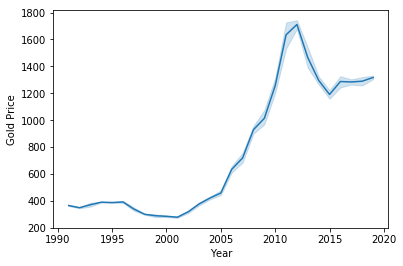

In [26]:
sns.lineplot(x = 'Year', y='Gold Price', data=goldmonthlyprice)